# Predicting heart disease using machine learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.  

We're going to take the following approach:  
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
In a statement,  

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository.    https://archive.ics.uci.edu/ml/datasets/heart+Disease  

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation
> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

# 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

Create data dictionary

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

# prepare the tools for this project

In [105]:
# import all the tools that we need

# Regular EDA and plotting libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for plots inside the jupyter notebook
%matplotlib inline

# models from scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [2]:
heart = pd.read_csv('heart-disease.csv')

In [3]:
heart.shape

(303, 14)

## Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.  

* What question(s) are you trying to solve?
* What kind of data do we have and how do we treat different types?
* What's missing from the data and how do you deal with it?
* Where are the outliers and why should you care about them?
* How can you add, change or remove features to get more out of your data?

In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

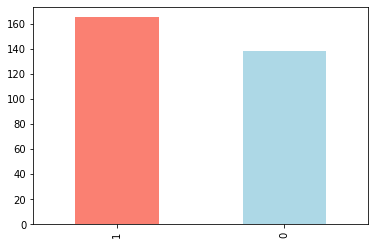

In [7]:
heart.target.value_counts().plot(kind='bar',color=['salmon','lightblue']);

In [8]:
heart.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disease attribute according to Gender

In [10]:
heart.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
pd.crosstab(heart.target,heart.sex)

sex,0,1
target,,
0,24,114
1,72,93


(0.0, 120.0)

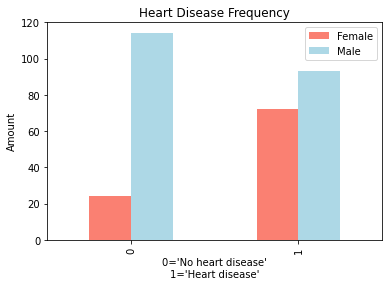

In [12]:
pd.crosstab(heart.target,heart.sex).plot(kind='bar',color=['salmon','lightblue'])
plt.title('Heart Disease Frequency')
plt.legend(['Female','Male'])
plt.ylabel('Amount')
plt.xlabel("0='No heart disease'\n1='Heart disease'")
plt.ylim([0,120])

In [13]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

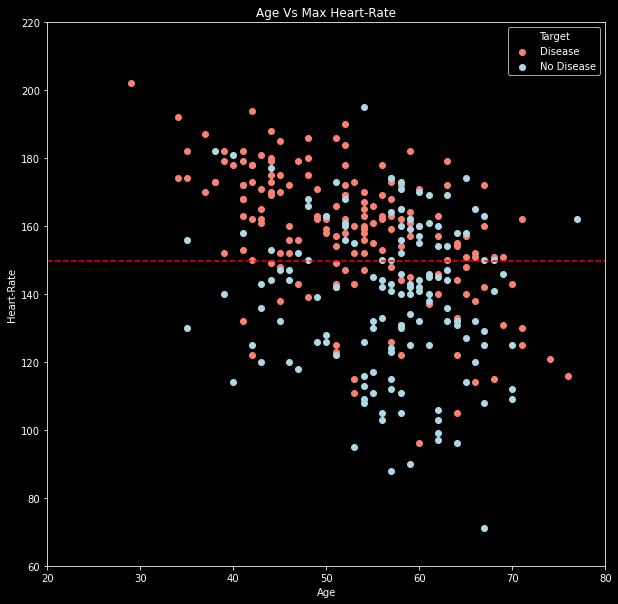

In [14]:
plt.style.use('dark_background')
fig,ax=plt.subplots(figsize=(10,10))
plt.scatter(x=heart.age[heart.target==1],y=heart.thalach[heart.target==1],color='salmon',label='Disease')
plt.scatter(x=heart.age[heart.target==0],y=heart.thalach[heart.target==0],color='lightblue',label='No Disease')
plt.title('Age Vs Max Heart-Rate')
plt.ylabel('Heart-Rate')
plt.xlabel('Age')
plt.xlim([20,80])
plt.ylim([60,220])
plt.legend(title='Target')
plt.axhline(heart.thalach.mean(),linestyle='--',color='red');

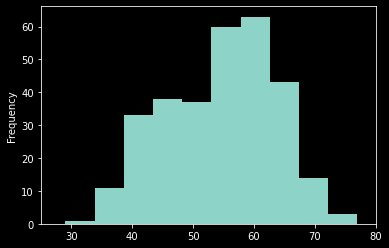

In [15]:
heart.age.plot(kind='hist')
plt.xlim([25,80]);

In [16]:
# checking patterns on chest pain

In [17]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
heart.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [19]:
pd.crosstab(heart.cp,heart.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<Figure size 720x720 with 0 Axes>

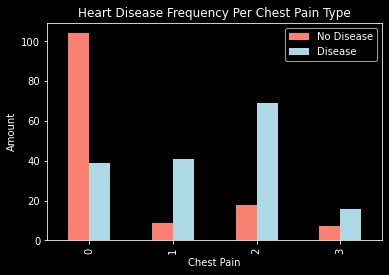

In [20]:
plt.figure(figsize=(10,10))
pd.crosstab(heart.cp,heart.target).plot(kind='bar',color=['salmon','lightblue'])
plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel(str("chest pain").title())
plt.ylabel(str('amount').title())
plt.legend(['No Disease','Disease'])
plt.xticks()
plt.show()

In [21]:
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


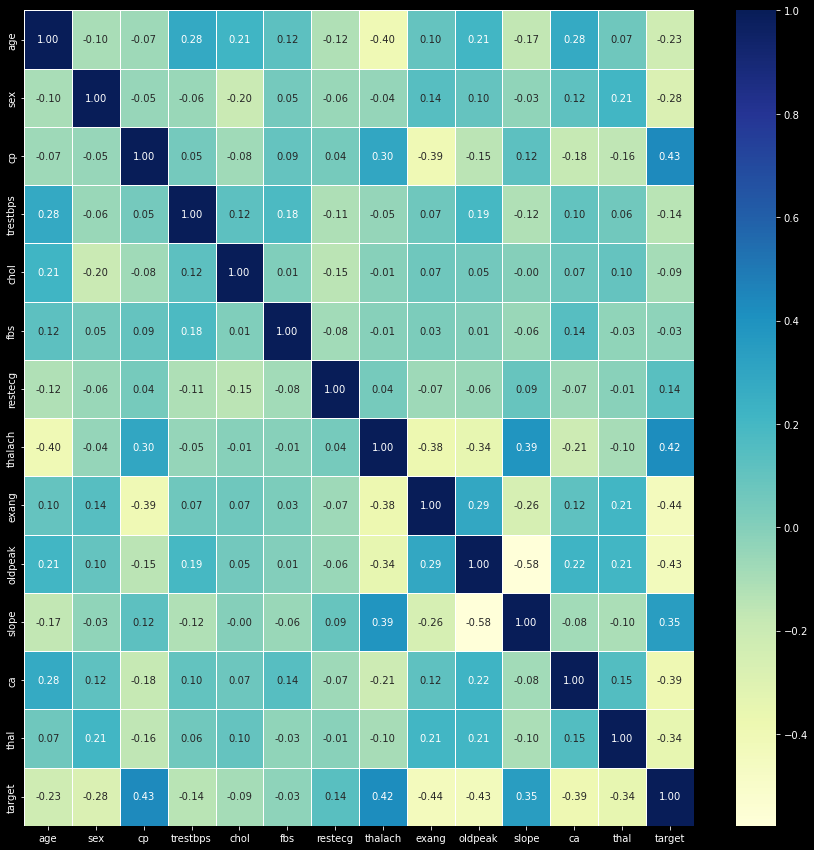

In [22]:
correlation=heart.corr()
fig,ax=plt.subplots(figsize=(15,15))
ax=sns.heatmap(correlation,annot=True,linewidth=0.5,fmt='.2f',cmap='YlGnBu')

## Modelling

In [23]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
# features
x=heart.drop('target',axis=1)
# label
y=heart.target

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [26]:
model_name={'LogisticRegression':LogisticRegression(),
            'RandomForestClassifier':RandomForestClassifier(),
            'KNeighborsClassifier':KNeighborsClassifier()}
result=dict()

In [27]:
for model_n,model in model_name.items():
    print(f"Using : {model_n}")
    model.fit(x_train,y_train)
    result[model_n]=model.score(x_test,y_test)
    print(f'Score: {result[model_n]}')
result

Using : LogisticRegression
Score: 0.8524590163934426
Using : RandomForestClassifier
Score: 0.8688524590163934
Using : KNeighborsClassifier
Score: 0.6885245901639344


C:\Users\jains\JUPYTER\MilestoneClassifier\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8524590163934426,
 'RandomForestClassifier': 0.8688524590163934,
 'KNeighborsClassifier': 0.6885245901639344}

Text(0.5, 1.0, 'Result')

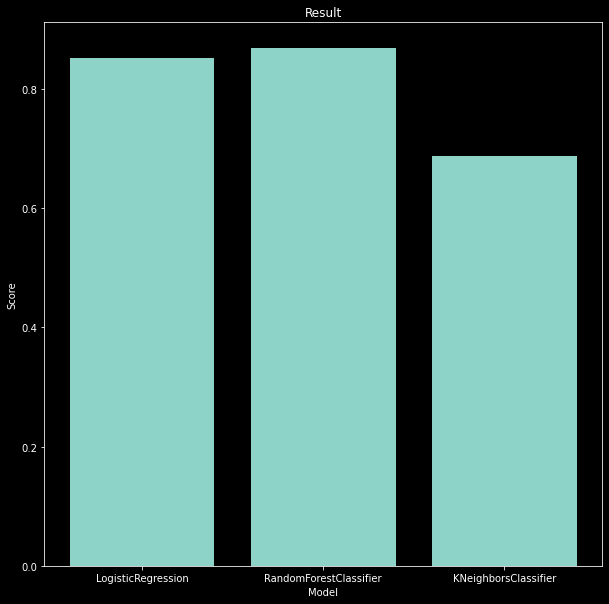

In [49]:
plt.figure(figsize=(10,10))
plt.bar(result.keys(),result.values())
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Result')

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning

In [42]:
train_score=[]
test_score=[]

# selecting knn as model
model=KNeighborsClassifier()

# neighbors
neighbors = range(1,21)

# loop through different values of neighbors
for i in neighbors:
    model.set_params(n_neighbors=i)
    model.fit(x_train,y_train)
    print((i),model.score(x_test,y_test))
    train_score.append(model.score(x_train,y_train))
    test_score.append(model.score(x_test,y_test))

1 0.6229508196721312
2 0.6229508196721312
3 0.6885245901639344
4 0.6885245901639344
5 0.6885245901639344
6 0.6721311475409836
7 0.6721311475409836
8 0.7213114754098361
9 0.639344262295082
10 0.6721311475409836
11 0.639344262295082
12 0.6229508196721312
13 0.639344262295082
14 0.639344262295082
15 0.6229508196721312
16 0.6557377049180327
17 0.6229508196721312
18 0.6885245901639344
19 0.6557377049180327
20 0.639344262295082


In [34]:
train_score

[1.0,
 0.8016528925619835,
 0.7768595041322314,
 0.7520661157024794,
 0.756198347107438,
 0.756198347107438,
 0.756198347107438,
 0.7479338842975206,
 0.731404958677686,
 0.7148760330578512,
 0.6983471074380165,
 0.7066115702479339,
 0.71900826446281,
 0.7148760330578512,
 0.6983471074380165,
 0.6983471074380165,
 0.6983471074380165,
 0.6942148760330579,
 0.7107438016528925,
 0.7066115702479339]

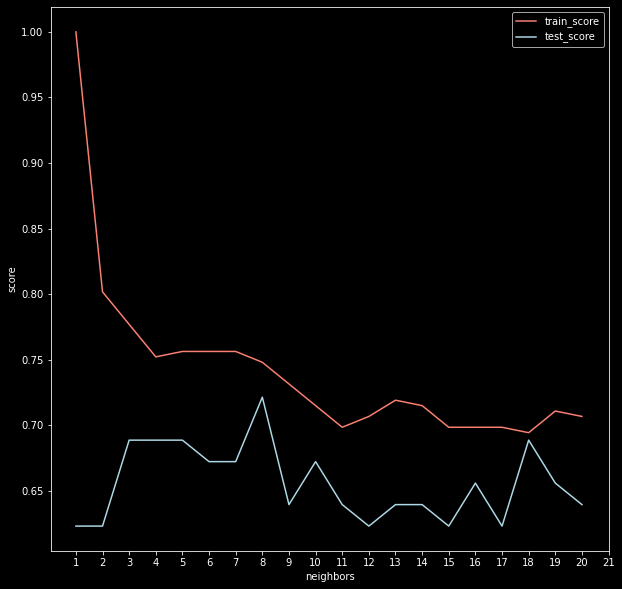

KNN Maximum score on the test data: 72.13%


In [40]:

plt.figure(figsize=(10,10))
plt.plot(neighbors,train_score,c='salmon',label='train_score')
plt.plot(neighbors,test_score,c='lightblue',label='test_score')
plt.legend()
plt.xlabel('neighbors')
plt.ylabel('score')
plt.xticks(np.arange(1,22,1))
plt.show();
print(f'KNN Maximum score on the test data: {max(test_score)*100:.2f}%')

 we will just discard it as we cannot tune it as near as random or logistic regression

## Hyperparameter search using RandomSearchCV
So we are going to tune these model for the best accuracy
* LogisticRegression()
* RandomForestClassifier()

In [71]:
model=LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = np.logspace(-4,4,30)
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values,)

In [72]:
rs=RandomizedSearchCV(estimator=model,param_distributions=grid,cv=5,n_iter=20,scoring='accuracy',n_jobs=1,verbose=3)
rs.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END C=0.1082636733874054, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 2/5] END C=0.1082636733874054, penalty=l2, solver=newton-cg;, score=0.816 total time=   0.0s
[CV 3/5] END C=0.1082636733874054, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 4/5] END C=0.1082636733874054, penalty=l2, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=0.1082636733874054, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 1/5] END C=117.21022975334793, penalty=l2, solver=liblinear;, score=0.878 total time=   0.0s
[CV 2/5] END C=117.21022975334793, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=117.21022975334793, penalty=l2, solver=liblinear;, score=0.792 total time=   0.0s
[CV 4/5] END C=117.21022975334793, penalty=l2, solver=liblinear;, score=0.812 total time=   0.0s
[CV 5/5] END C=117.21022975334793, penalty=l2, solver=liblinear;,

C:\Users\jains\JUPYTER\MilestoneClassifier\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jains\JUPYTER\MilestoneClassifier\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

[CV 5/5] END C=1.3738237958832638, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 1/5] END C=1487.3521072935118, penalty=l2, solver=newton-cg;, score=0.878 total time=   0.0s
[CV 2/5] END C=1487.3521072935118, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=1487.3521072935118, penalty=l2, solver=newton-cg;, score=0.771 total time=   0.0s
[CV 4/5] END C=1487.3521072935118, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 5/5] END C=1487.3521072935118, penalty=l2, solver=newton-cg;, score=0.771 total time=   0.0s
[CV 1/5] END C=4.893900918477489, penalty=l2, solver=liblinear;, score=0.878 total time=   0.0s
[CV 2/5] END C=4.893900918477489, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=4.893900918477489, penalty=l2, solver=liblinear;, score=0.812 total time=   0.0s
[CV 4/5] END C=4.893900918477489, penalty=l2, solver=liblinear;, score=0.812 total time=   0.0s
[CV 5/5] END C=4.893900918477489, pena

C:\Users\jains\JUPYTER\MilestoneClassifier\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jains\JUPYTER\MilestoneClassifier\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

[CV 3/5] END C=62.10169418915616, penalty=l2, solver=lbfgs;, score=0.812 total time=   0.0s
[CV 4/5] END C=62.10169418915616, penalty=l2, solver=lbfgs;, score=0.812 total time=   0.0s
[CV 5/5] END C=62.10169418915616, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 1/5] END C=2807.2162039411755, penalty=l2, solver=lbfgs;, score=0.878 total time=   0.0s
[CV 2/5] END C=2807.2162039411755, penalty=l2, solver=lbfgs;, score=0.837 total time=   0.0s
[CV 3/5] END C=2807.2162039411755, penalty=l2, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 4/5] END C=2807.2162039411755, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=2807.2162039411755, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 1/5] END C=9.236708571873866, penalty=l2, solver=newton-cg;, score=0.878 total time=   0.0s
[CV 2/5] END C=9.236708571873866, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=9.236708571873866, penalty=l2, solver=newton-cg;, sc

C:\Users\jains\JUPYTER\MilestoneClassifier\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jains\JUPYTER\MilestoneClassifier\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

[CV 5/5] END C=9.236708571873866, penalty=l2, solver=newton-cg;, score=0.771 total time=   0.0s
[CV 1/5] END C=9.236708571873866, penalty=l2, solver=liblinear;, score=0.878 total time=   0.0s
[CV 2/5] END C=9.236708571873866, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=9.236708571873866, penalty=l2, solver=liblinear;, score=0.812 total time=   0.0s
[CV 4/5] END C=9.236708571873866, penalty=l2, solver=liblinear;, score=0.812 total time=   0.0s
[CV 5/5] END C=9.236708571873866, penalty=l2, solver=liblinear;, score=0.833 total time=   0.0s
[CV 1/5] END C=0.00018873918221350977, penalty=l2, solver=liblinear;, score=0.694 total time=   0.0s
[CV 2/5] END C=0.00018873918221350977, penalty=l2, solver=liblinear;, score=0.653 total time=   0.0s
[CV 3/5] END C=0.00018873918221350977, penalty=l2, solver=liblinear;, score=0.625 total time=   0.0s
[CV 4/5] END C=0.00018873918221350977, penalty=l2, solver=liblinear;, score=0.708 total time=   0.0s
[CV 5/5] END C=0.000

C:\Users\jains\JUPYTER\MilestoneClassifier\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jains\JUPYTER\MilestoneClassifier\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=1,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   scoring='accuracy', verbose=3)

In [73]:
rs.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 32.90344562312671}

In [74]:
rs.score(x_test,y_test)

0.8524590163934426

In [75]:
ran_grid={"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
model=RandomForestClassifier()

In [76]:
rsf=RandomizedSearchCV(estimator=model,param_distributions=ran_grid,n_iter=20,cv=5,n_jobs=1,verbose=3)
rsf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=810;, score=0.837 total time=   0.6s
[CV 2/5] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=810;, score=0.878 total time=   0.7s
[CV 3/5] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=810;, score=0.792 total time=   0.6s
[CV 4/5] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=810;, score=0.792 total time=   0.6s
[CV 5/5] END max_depth=None, min_samples_leaf=13, min_samples_split=14, n_estimators=810;, score=0.792 total time=   0.6s
[CV 1/5] END max_depth=3, min_samples_leaf=13, min_samples_split=18, n_estimators=810;, score=0.837 total time=   0.6s
[CV 2/5] END max_depth=3, min_samples_leaf=13, min_samples_split=18, n_estimators=810;, score=0.878 total time=   0.6s
[CV 3/5] END max_depth=3, min_samples_leaf=13, min_samples_split=18, n_estimators=810;, sc

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=3)

In [77]:
rsf.best_params_

{'n_estimators': 610,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 3}

In [78]:
rsf.score(x_test,y_test)

0.8360655737704918

Since our logisticRegression model proves to be the best out of these models thus we will use gridSearch only on logistic regression

## HyperParameter tuning using GridSearchCV

In [86]:
grid={"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

In [87]:
model=LogisticRegression()
model

LogisticRegression()

In [92]:
gs=GridSearchCV(estimator=model,param_grid=grid,cv=5,verbose=True)
gs.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [95]:
gs.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [96]:
gs.score(x_test,y_test)

0.8524590163934426

## Evaluting our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score  
... and it would be great if cross-validation was used where possible.

> To make comparisons and evaluate our trained model, first we need to make predictions

In [97]:
y_preds=gs.predict(x_test)

C:\Users\jains\JUPYTER\MilestoneClassifier\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


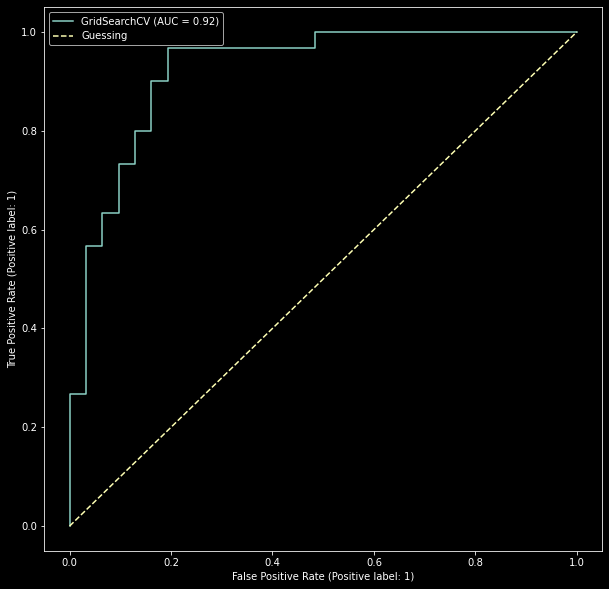

In [104]:
fig,ax=plt.subplots(figsize=(10,10))
plot_roc_curve(estimator=gs,X=x_test,y=y_test,ax=ax)
plt.plot([0,1],[0,1],linestyle='--',label='Guessing')
plt.legend()

In [106]:
print(confusion_matrix(y_test,y_preds))

[[23  8]
 [ 1 29]]


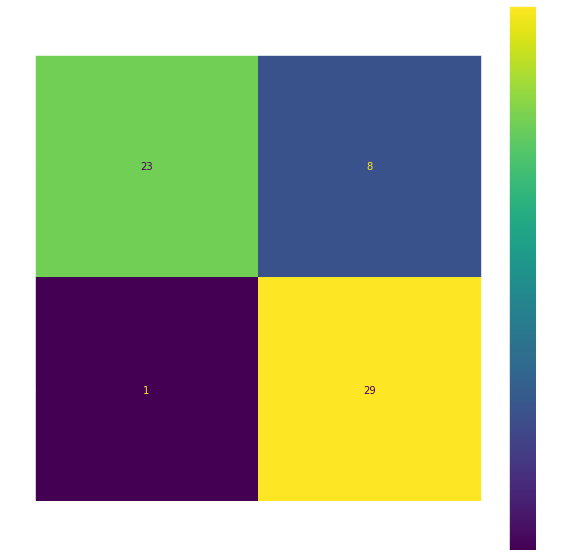

In [116]:
fig,ax=plt.subplots(figsize=(10,10))
ConfusionMatrixDisplay.from_estimator(estimator=gs,X=x_test,y=y_test,ax=ax)

In [120]:
print(classification_report(y_true=y_test,y_pred=y_preds))


              precision    recall  f1-score   support

           0       0.96      0.74      0.84        31
           1       0.78      0.97      0.87        30

    accuracy                           0.85        61
   macro avg       0.87      0.85      0.85        61
weighted avg       0.87      0.85      0.85        61



In [165]:
model=LogisticRegression(C=0.1082636733874054, solver= 'liblinear')
model.fit(x_train,y_train)

LogisticRegression(C=0.1082636733874054, solver='liblinear')

In [166]:
#recall score
np.random.seed(0)
cr_rec=cross_val_score(estimator=model,X=x_test,y=y_test,cv=5,scoring='recall')
cr_rec_sc=np.mean(cr_rec)
print(cr_nor_sc)

0.6923076923076923


In [167]:
# accuracy score
np.random.seed(0)
cr_acc=cross_val_score(estimator=model,X=x_test,y=y_test,cv=5,scoring='accuracy')
cr_acc_sc=np.mean(cr_acc)
print(cr_acc_sc)

0.6923076923076923


In [168]:
#precision score
np.random.seed(0)
cr_pre=cross_val_score(estimator=model,X=x_test,y=y_test,cv=5,scoring='precision')
cr_pre_sc=np.mean(cr_pre)
print(cr_pre_sc)

0.7047619047619047


In [169]:
# f1 score
np.random.seed(0)
cr_f1=cross_val_score(estimator=model,X=x_test,y=y_test,cv=5,scoring='f1')
cr_f1_sc=np.mean(cr_f1)
print(cr_f1_sc)

0.6933333333333334


In [170]:
scoreDict=dict(recall=cr_rec_sc,accuracy=cr_acc_sc,f1=cr_f1_sc,precision=cr_pre_sc)
scoreDict

{'recall': 0.7,
 'accuracy': 0.6923076923076923,
 'f1': 0.6933333333333334,
 'precision': 0.7047619047619047}

In [171]:
scoreDf=pd.DataFrame(scoreDict,index=['score'])

In [172]:
scoreDf

,recall,accuracy,f1,precision
score,0.7,0.692308,0.693333,0.704762


(0.0, 1.0)

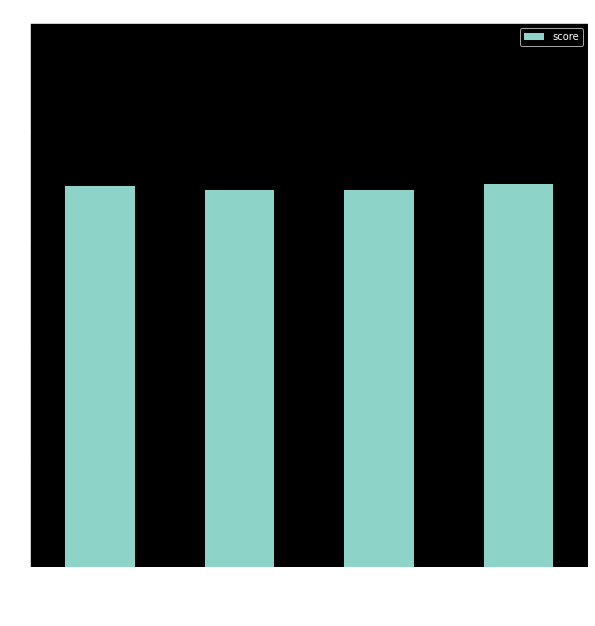

In [162]:
scoreDf.T.plot.bar(figsize=(10,10))
plt.title('Cross-Validated Classification Metrics')
plt.ylim([0,1])

## Feature Importance
Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"  

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".  

Let's find the feature importance for our LogisticRegression model...

In [173]:
model

LogisticRegression(C=0.1082636733874054, solver='liblinear')

In [174]:
model.coef_

array([[ 0.0102066 , -0.53805982,  0.60028182, -0.0144127 , -0.00139856,
        -0.13423809,  0.24393734,  0.0238123 , -0.46271654, -0.48161744,
         0.28164638, -0.58739447, -0.55703281]])

In [175]:
feature_dict=dict(zip(heart.columns,model.coef_[0]))
feature_dict

{'age': 0.010206600326209228,
 'sex': -0.538059824107496,
 'cp': 0.6002818211979986,
 'trestbps': -0.014412702795975217,
 'chol': -0.001398555822398358,
 'fbs': -0.134238085929095,
 'restecg': 0.24393733620968916,
 'thalach': 0.023812304422021716,
 'exang': -0.4627165428342224,
 'oldpeak': -0.481617440431873,
 'slope': 0.28164637573197854,
 'ca': -0.5873944722930472,
 'thal': -0.5570328075864459}

Text(0, 0.5, 'Correlation Scores')

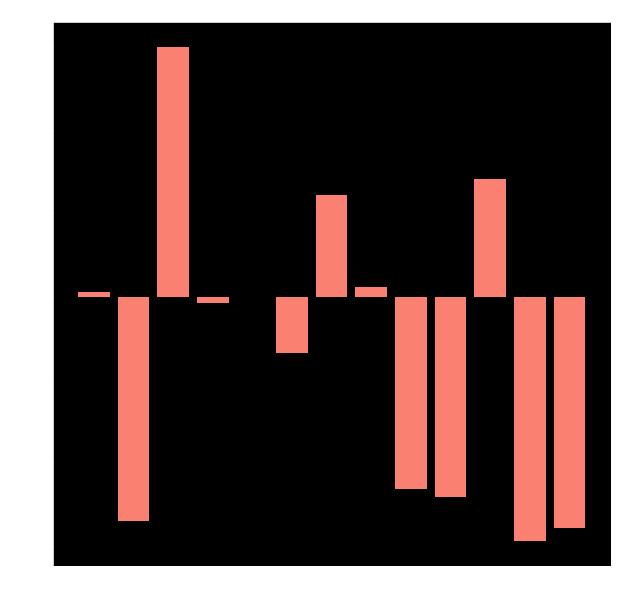

In [184]:
plt.figure(figsize=(10,10))
plt.bar(feature_dict.keys(),feature_dict.values(),color='salmon',)
plt.title('feature importance'.title())
plt.xlabel('columns'.title())
plt.ylabel('correlation scores'.title())

## Experimentation
If you haven't hit your evaluation metric yet... ask yourself...

> * Could you collect more data?
> * Could you try a better model? Like CatBoost or XGBoost?
> * Could you improve the current models? (beyond what we've done so far)
> * If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?